#Importing neccesary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data importing

In [ ]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
y = dataset.iloc[:, -1].values

#Data cleaning








In [ ]:
dataset.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3496,ham,"Oh, the grand is having a bit of a party but i...",NaN,NaN,NaN
2819,spam,INTERFLORA - åÒIt's not too late to order Inte...,NaN,NaN,NaN
5223,ham,If I die I want u to have all my stuffs.,NaN,NaN,NaN
1095,ham,Ryder unsold.now gibbs.,NaN,NaN,NaN
3616,ham,Sorry sent blank msg again. Yup but trying 2 d...,NaN,NaN,NaN


In [ ]:
#remove last 3 columns
dataset.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [ ]:
#renaming the column
dataset.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [ ]:
#label the target repalce spam as 1 ham as 0
dataset['target'] = dataset['target'].map({'spam': 1, 'ham': 0})
dataset.head()



,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values
dataset.isnull().sum()


,0
target,0
text,0


In [ ]:
#check for duplicate values
dataset.duplicated().sum()

403

In [ ]:
#removing the duplicates
dataset=dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()


0

In [ ]:
dataset.shape

(5169, 2)

In [ ]:
dataset['target'].value_counts()

,count
target,
0,4516
1,653


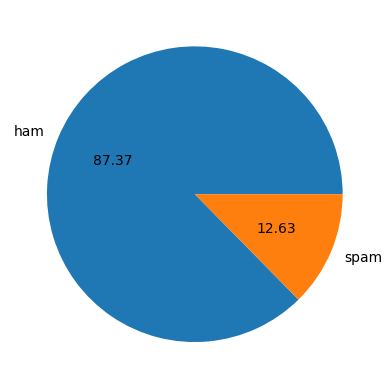

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install nltk

In [ ]:
dataset['num_characters'] = dataset['text'].apply(len)


In [ ]:
dataset.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words in a text
dataset['num_words'] = dataset['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
dataset.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
dataset['num_sentences']=dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#describe the ham
dataset[dataset['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describe the spam
dataset[dataset['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

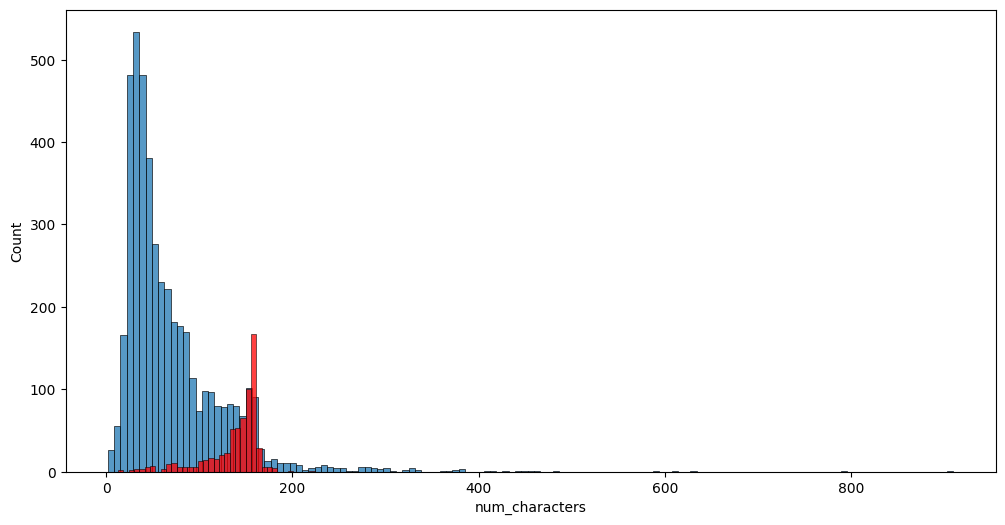

In [ ]:
#import seaborn
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target']==0]['num_characters'])
sns.histplot(dataset[dataset['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

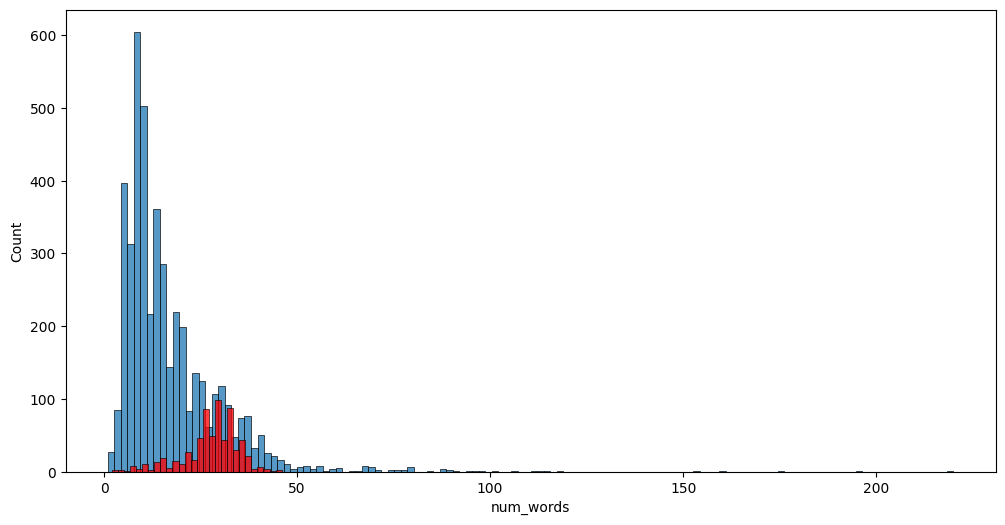

In [ ]:
#same for words
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target']==0]['num_words'])
sns.histplot(dataset[dataset['target']==1]['num_words'],color='red')

#Data preprocessing
















In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text) #tokenization
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return y


In [ ]:
dataset['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#punctuation
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('driving')

'drive'

In [ ]:
#create another column transformed text
dataset['transformed_text']=dataset['text'].apply(transform_text)


In [ ]:
dataset['transformed_text'] = dataset['transformed_text'].astype(str)

In [ ]:
#using wordcloudd
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

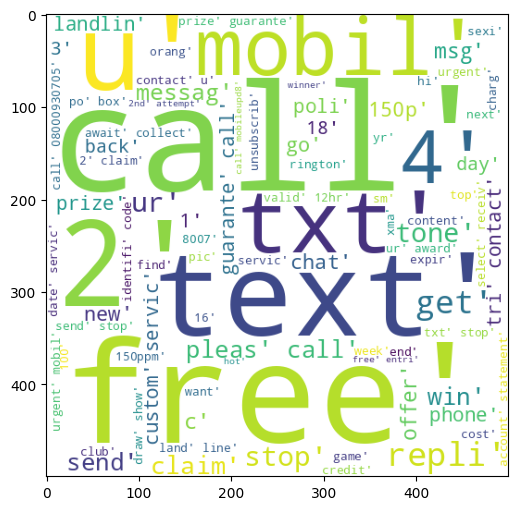

In [ ]:
spam_wc = wc.generate(dataset[dataset['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

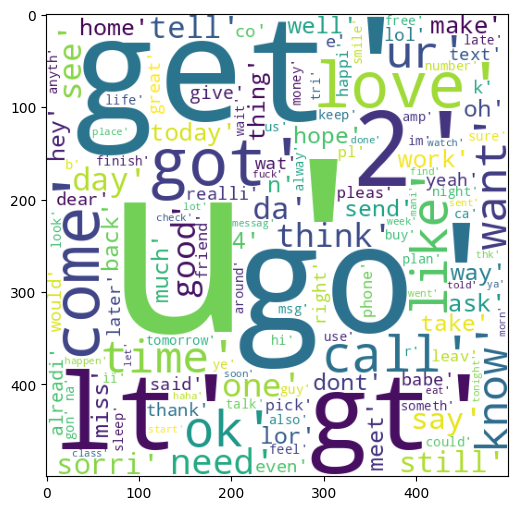

In [ ]:
ham_wc = wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
word_corpus=[]
for msg in dataset[dataset['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    word_corpus.append(word)


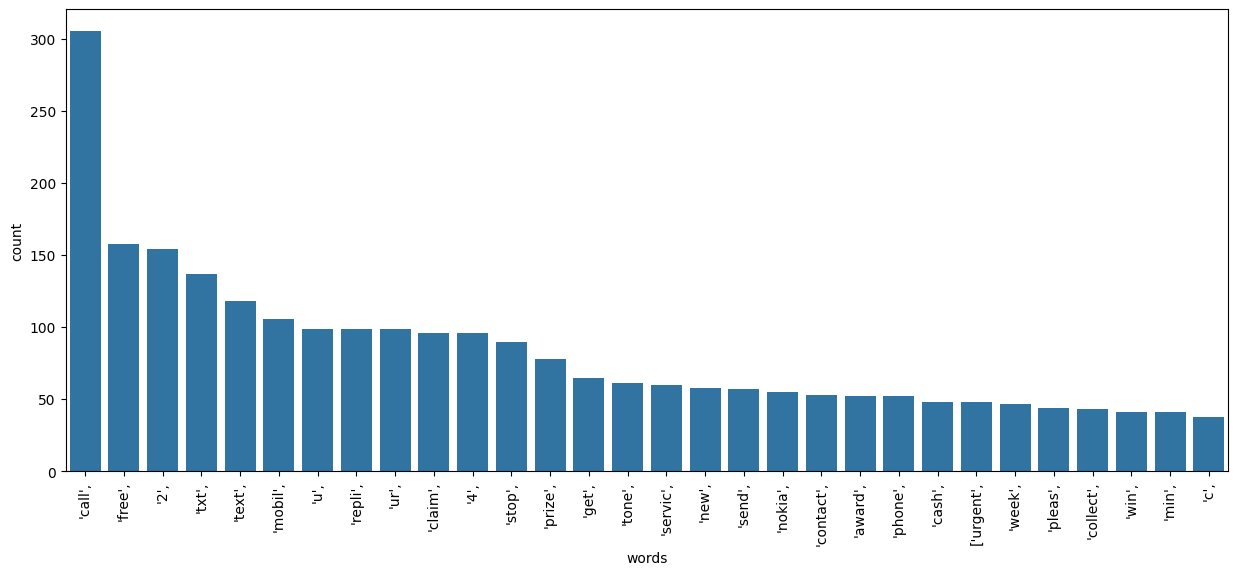

In [ ]:
from collections import Counter
Counter(word_corpus).most_common(30)

freq_df = pd.DataFrame(Counter(word_corpus).most_common(30))
freq_df.rename(columns={0: 'words', 1: 'count'}, inplace=True)
freq_df.head()

#bar graph
plt.figure(figsize=(15,6))
sns.barplot(x=freq_df['words'], y=freq_df['count'])
plt.xticks(rotation='vertical')
plt.show()





In [ ]:
word_corpus=[]
for msg in dataset[dataset['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    word_corpus.append(word)
len(word_corpus)

35413

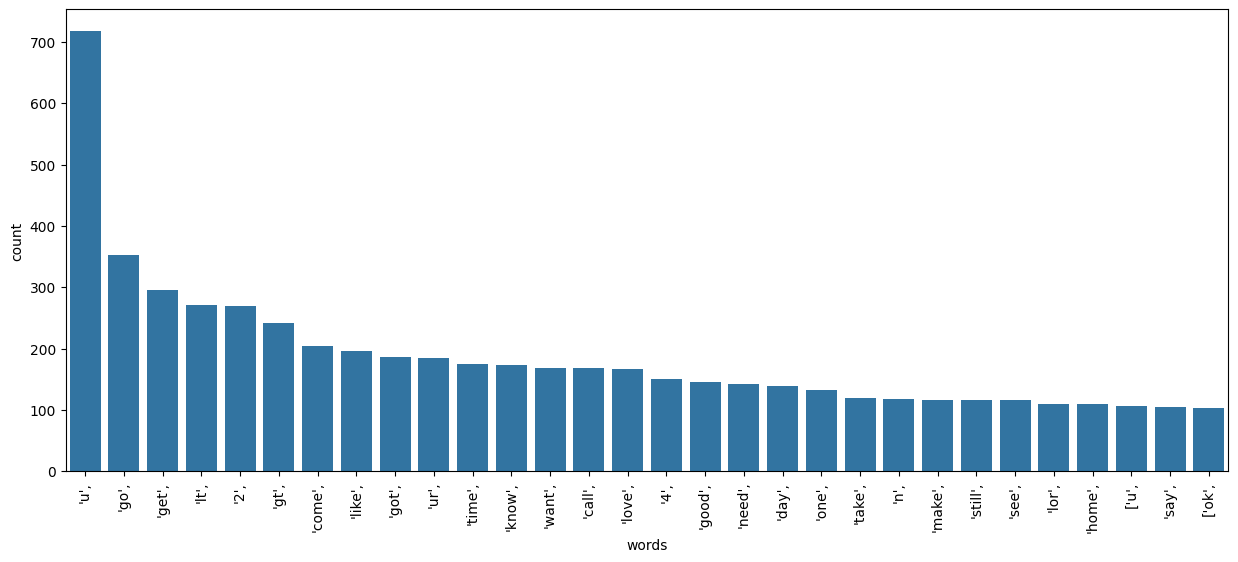

In [ ]:
from collections import Counter
Counter(word_corpus).most_common(30)

freq_df = pd.DataFrame(Counter(word_corpus).most_common(30))
freq_df.rename(columns={0: 'words', 1: 'count'}, inplace=True)
freq_df.head()

#bar graph
plt.figure(figsize=(15,6))
sns.barplot(x=freq_df['words'], y=freq_df['count'])
plt.xticks(rotation='vertical')
plt.show()

#Model Building


##feature extraction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()


In [ ]:
X=cv.fit_transform(dataset['transformed_text']).toarray()
X.shape #(sms, words)

(5169, 6708)

In [ ]:
y=dataset['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.888631090487239
[[996 125]
 [ 19 153]]
0.5503597122302158


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.974477958236659
[[1103   18]
 [  15  157]]
0.8971428571428571


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690641918020109
[[1116    5]
 [  35  137]]
0.9647887323943662


TfidfVectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)




In [ ]:
X=tfidf.fit_transform(dataset['transformed_text']).toarray()


In [ ]:
#apply scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
y=dataset['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.877030162412993
[[981 140]
 [ 19 153]]
0.5221843003412969


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9814385150812065
[[1118    3]
 [  21  151]]
0.9805194805194806


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9783449342614076
[[1120    1]
 [  27  145]]
0.9931506849315068


In [ ]:
# i choose a tfidf and mnb


##Using diffrent models for checking precision and accuracy



In [ ]:
#Using diffrent models for checking precision and accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#building logistic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9752513534416086
0.9929577464788732


In [ ]:
#building SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9791183294663574
0.9931972789115646


In [ ]:
#building KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9180201082753287
1.0


In [ ]:
#building DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9597834493426141
0.8409090909090909


In [ ]:
#building random forest
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.979891724671307
0.9932432432432432


In [ ]:
#store every model's accuracy and precision in a datframe

model_results = {
    'Model': ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy': [],
    'Precision': []
}

models = [GaussianNB(), MultinomialNB(), BernoulliNB(), LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_results['Accuracy'].append(accuracy_score(y_test, y_pred))
  model_results['Precision'].append(precision_score(y_test, y_pred))

df_results = pd.DataFrame(model_results)


In [ ]:
df_results

,Model,Accuracy,Precision
0,GaussianNB,0.877030,0.522184
1,MultinomialNB,0.981439,0.980519
2,BernoulliNB,0.978345,0.993151
3,LogisticRegression,0.975251,0.992958
4,SVC,0.979118,0.993197
5,KNeighborsClassifier,0.918020,1.000000
6,DecisionTreeClassifier,0.953596,0.807692
7,RandomForestClassifier,0.979892,0.993243


In [ ]:
# printing according to descending order of pression
df_results.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision
5,KNeighborsClassifier,0.918020,1.000000
7,RandomForestClassifier,0.979892,0.993243
4,SVC,0.979118,0.993197
2,BernoulliNB,0.978345,0.993151
3,LogisticRegression,0.975251,0.992958
1,MultinomialNB,0.981439,0.980519
6,DecisionTreeClassifier,0.953596,0.807692
0,GaussianNB,0.877030,0.522184


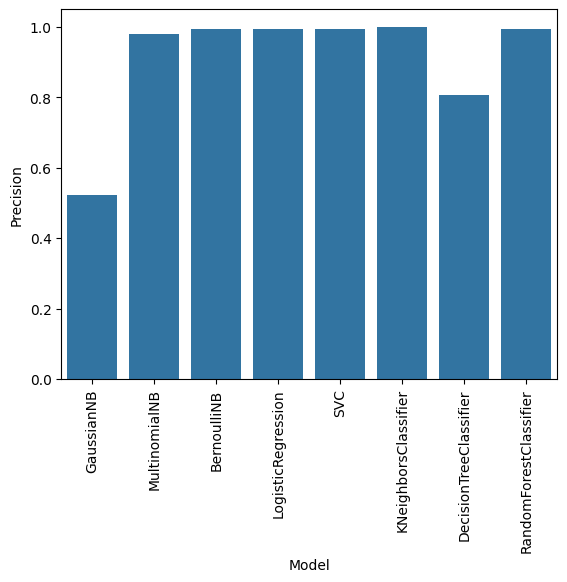

In [ ]:
#drawing bar graph for same both accuracy precision with colors
sns.barplot(x='Model', y='Precision', data=df_results)
plt.xticks(rotation='vertical')
plt.show()






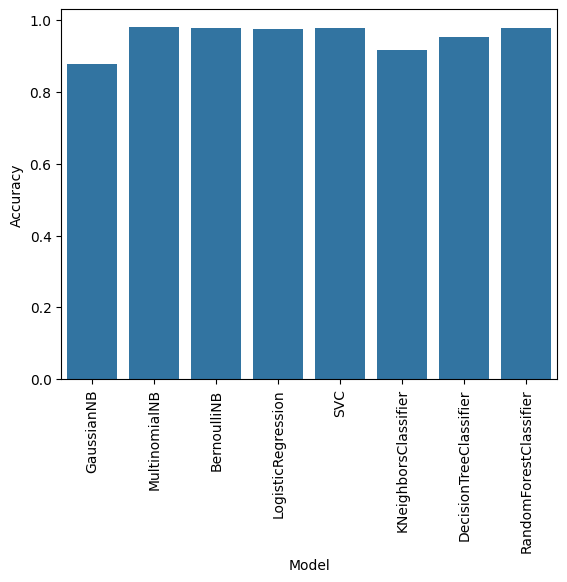

In [ ]:
sns.barplot(x='Model', y='Accuracy', data=df_results)
plt.xticks(rotation='vertical')
plt.show()

Improvement in the model


In [ ]:
from sklearn.ensemble import VotingClassifier
# Create individual models
mnb = MultinomialNB()
knn = KNeighborsClassifier()
bnb = BernoulliNB()

voting_classifier = VotingClassifier(
    estimators=[('mnb', mnb), ('knn', knn), ('bnb', bnb)],
    voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Accuracy: 0.9814385150812065
Precision: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid_mnb = {'alpha': [0.1, 0.5, 1.0]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_bnb = {'alpha': [0.1, 0.5, 1.0]}


grid_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5, scoring='accuracy')
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=5, scoring='accuracy')

# Fit the grid searches
grid_mnb.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_bnb.fit(X_train, y_train)

# Get the best estimators
best_mnb = grid_mnb.best_estimator_
best_knn = grid_knn.best_estimator_
best_bnb = grid_bnb.best_estimator_

# Create a new voting classifier with the best estimators
voting_classifier = VotingClassifier(
    estimators=[('mnb', best_mnb), ('knn', best_knn), ('bnb', best_bnb)],
    voting='hard'
)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

